In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_errorS

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Q1. Who are the busiest hosts?

In [17]:
# Sort out the number of listings per host
df['host_id'].value_counts().head(100)

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
53179388      10
172369331     10
159811367     10
239660813     10
22384027      10
Name: host_id, Length: 100, dtype: int64

In [18]:
# Check the hosts that have listings over or equal to 10
df[df['calculated_host_listings_count']>=10]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
261,63610,DOMINIQUE'S NY mini efficiency* wifi*metro*quiet,310670,Vie,Bronx,Eastchester,40.88057,-73.83572,Entire home/apt,105,2,38,2019-06-27,0.50,13,365
321,77765,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73749,-73.95292,Private room,179,3,36,2019-07-01,0.36,28,79
327,80684,Duplex w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73776,-73.95327,Private room,349,3,8,2016-03-27,0.09,28,60
328,80700,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73738,-73.95482,Private room,349,3,7,2019-05-24,0.07,28,60
330,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249,3,2,2011-05-12,0.02,28,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48723,36404684,Smart Nolita 1BR w/ W/D near famous cafes by B...,107434423,Blueground,Manhattan,Nolita,40.72283,-73.99472,Entire home/apt,316,30,0,NaN,NaN,232,325
48724,36404784,Dapper Hell's Kitchen 2BR w/ Gym + W/D + Door...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76082,-73.99709,Entire home/apt,385,30,0,NaN,NaN,232,338
48725,36404815,Trendy Hell's Kitchen 1BR w/ Gym + W/D + Doorm...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76083,-73.99727,Entire home/apt,267,30,0,NaN,NaN,232,228
48726,36404936,Beautiful Williamsburg 2BR w/ Skyline views + ...,107434423,Blueground,Brooklyn,Williamsburg,40.71493,-73.96365,Entire home/apt,278,30,0,NaN,NaN,232,188


In [19]:
# Check which area these hosts have listings
df[df['calculated_host_listings_count']>=10]['neighbourhood_group'].value_counts()

Manhattan    2309
Brooklyn      574
Queens        270
Bronx          24
Name: neighbourhood_group, dtype: int64

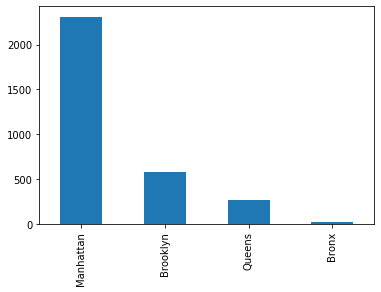

In [20]:
df[df['calculated_host_listings_count']>=10]['neighbourhood_group'].value_counts().plot(kind='bar')

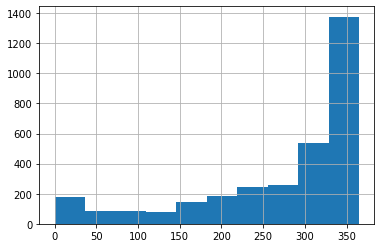

In [32]:
df[df['calculated_host_listings_count']>=10]['availability_365'].hist()

In [30]:
# Check hosts that has listings over or equal to 10 and the availability is less than or equal to 10
df[(df['calculated_host_listings_count']>=10) & (df['availability_365']<=10)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,2018-05-05,0.33,11,0
3947,2458656,Beautiful 1br loft in Brooklyn,7503643,Vida,Brooklyn,Greenpoint,40.72708,-73.94171,Entire home/apt,149,30,1,2018-04-14,0.07,52,0
6252,4567433,Room #2 Near Manhattan NYC.,22384027,Shahana,Brooklyn,Brownsville,40.67068,-73.91633,Private room,39,1,89,2018-08-16,1.57,10,0
6329,4621713,Prime Union Square! Large 1BR~Great value,2119276,Host,Manhattan,Gramercy,40.73390,-73.98548,Entire home/apt,185,30,5,2019-01-24,0.10,39,1
6926,4963215,East Village Floor Thru plus Garden,7245581,Michael,Manhattan,East Village,40.72251,-73.97677,Entire home/apt,87,100,5,2019-01-02,0.10,19,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46487,35268730,87st 302,19303369,Hiroki,Queens,Elmhurst,40.74066,-73.87755,Private room,32,30,0,NaN,NaN,37,0
46489,35268861,87st 204,19303369,Hiroki,Queens,Elmhurst,40.74000,-73.87734,Private room,34,30,0,NaN,NaN,37,0
46490,35268953,87st304,19303369,Hiroki,Queens,Elmhurst,40.74045,-73.87776,Private room,30,30,0,NaN,NaN,37,0
46491,35269041,87st 203,19303369,Hiroki,Queens,Elmhurst,40.73847,-73.87750,Private room,32,30,0,NaN,NaN,37,0


In [31]:
# Check the host_id of these busiest hosts
df[(df['calculated_host_listings_count']>=10) & (df['availability_365']<=10)]['host_id'].value_counts()

19303369     24
137358866    13
100238132    12
51596474     12
204852306    11
200239515     9
107434423     9
61391963      7
12243051      5
16098958      4
7503643       3
156158778     3
3191545       3
45595980      2
172369331     2
14898658      2
213781715     2
5962328       2
22541573      2
2119276       2
47554473      1
260577152     1
61396454      1
131647128     1
836168        1
119669058     1
35524316      1
35927005      1
226410657     1
344035        1
7245581       1
16437254      1
22384027      1
Name: host_id, dtype: int64

In [23]:
# Check the area that these busiest hosts have listings
df[(df['calculated_host_listings_count']>=10) & (df['availability_365']<=10)]['neighbourhood_group'].value_counts()

Manhattan    58
Queens       42
Brooklyn     41
Bronx         1
Name: neighbourhood_group, dtype: int64

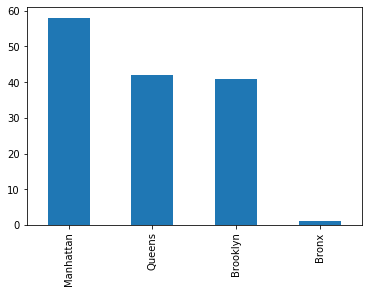

In [29]:
df[(df['calculated_host_listings_count']>=10) & (df['availability_365']<=10)]['neighbourhood_group'].value_counts().plot(kind='bar')

In [24]:
# Check the room type that these busiest hosts have
df[(df['calculated_host_listings_count']>=10) & (df['availability_365']<=10)]['room_type'].value_counts()

Private room       66
Entire home/apt    60
Shared room        16
Name: room_type, dtype: int64

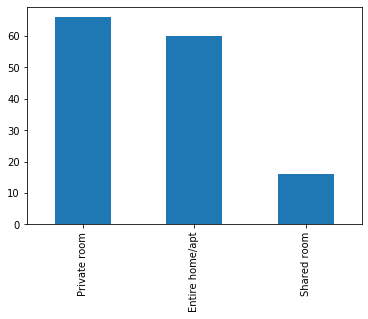

In [28]:
df[(df['calculated_host_listings_count']>=10) & (df['availability_365']<=10)]['room_type'].value_counts().plot(kind='bar')

Q2. What can we learn about different areas? 

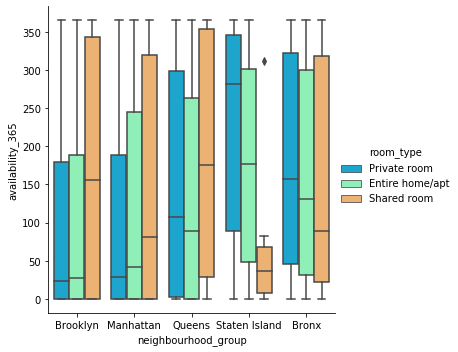

In [17]:
# Availability according to different room_type in different areas
sns.catplot(x="neighbourhood_group",y="availability_365",kind="box",hue="room_type",data=df,palette="rainbow")

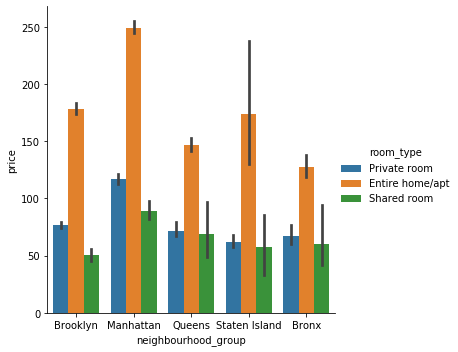

In [15]:
# Price according to different room_type in different areas
sns.catplot(x="neighbourhood_group",y="price",data=df,kind="bar",hue="room_type")

Q3. How can we predict the listing price?

In [50]:
# Check the types of each variable
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [17]:
# Check the numerical variable
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a255e1610>,
      dtype=object)

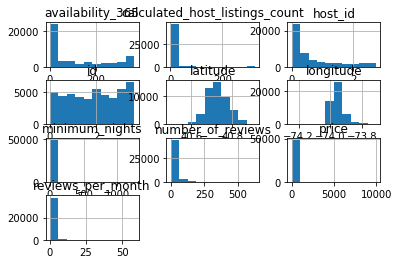

In [18]:
# Check the distribution of each numerical variable
df.hist()

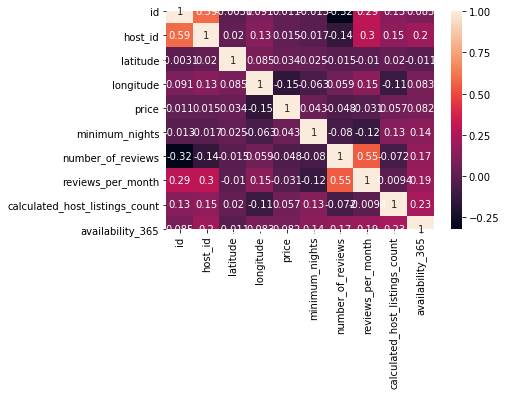

In [19]:
# Check the correlation between numerical variables
sns.heatmap(df.corr(),annot = True)

In [59]:
def create_dummy_df(df, cat_cols, dummy_na):
    
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [60]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=22):
  
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [85]:
df_new = df.drop(['name','host_name','neighbourhood','last_review','id','host_id','reviews_per_month'],axis=1)
cat_df = df_new.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns
df_new = create_dummy_df(df_new, cat_cols_lst, dummy_na=False)

In [86]:
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_new, 'price', cat_cols_lst, dummy_na=False)

In [87]:
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.10054510122718163.  The rsquared on the test data was 0.09298896869635609.


In [88]:
def coef_weights(coefficients, X_train):
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
1,longitude,-505.882321,505.882321
0,latitude,-191.871089,191.871089
9,neighbourhood_group_Staten Island,-144.893564,144.893564
11,room_type_Shared room,-138.691433,138.691433
10,room_type_Private room,-106.429382,106.429382
6,neighbourhood_group_Brooklyn,-31.175934,31.175934
7,neighbourhood_group_Manhattan,30.156344,30.156344
8,neighbourhood_group_Queens,-0.959503,0.959503
3,number_of_reviews,-0.299505,0.299505
5,availability_365,0.182948,0.182948
